In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
sns.set(color_codes=True)

df=pd.read_csv("master.csv")

In [2]:
#Changing column names for better accessibility and consistency
df.rename(columns={" gdp_for_year ($) ":"gdp_for_year", "gdp_per_capita ($)":"gdp_per_capita"}, inplace=True)
df['gdp_for_year']=df['gdp_for_year'].str.replace(',','').astype(float)
df

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year,gdp_per_capita,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,2.156625e+09,796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,2.156625e+09,796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,2.156625e+09,796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,2.156625e+09,796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,2.156625e+09,796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,6.306708e+10,2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,6.306708e+10,2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,6.306708e+10,2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,6.306708e+10,2309,Generation Z


# **Q1)a) Estimates of Mean and Variances of Suicides per 100K Population**

In [3]:
#Getting the population of each country in  a Series with index as the NAME of the COUNTRY
country_pop= pd.Series(np.array(df.groupby('country')['population'].sum())\
                       , index=df['country'].unique())

In [4]:
#List of Countries with population more than 10 Million
country_10mil=country_pop[country_pop>10000000].index
country_10mil

Index(['Albania', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan',
       'Bahrain', 'Belarus', 'Belgium', 'Brazil', 'Bulgaria', 'Canada',
       'Chile', 'Colombia', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus',
       'Czech Republic', 'Denmark', 'Ecuador', 'El Salvador', 'Estonia',
       'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Guatemala',
       'Guyana', 'Hungary', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan',
       'Kazakhstan', 'Kuwait', 'Kyrgyzstan', 'Latvia', 'Lithuania',
       'Luxembourg', 'Malta', 'Mauritius', 'Mexico', 'Netherlands',
       'New Zealand', 'Nicaragua', 'Norway', 'Panama', 'Paraguay',
       'Philippines', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar',
       'Republic of Korea', 'Romania', 'Russian Federation', 'Serbia',
       'Singapore', 'Slovakia', 'Slovenia', 'South Africa', 'Spain',
       'Sri Lanka', 'Suriname', 'Sweden', 'Switzerland', 'Thailand',
       'Trinidad and Tobago', 'Turkey', 'Turkmenistan', 'Ukraine',
      

In [5]:
#df[df['country']=='United States']['year'].unique()# 1985-2015
#df[df['country']=='United Kingdom']['year'].unique()# 1985-2015
#df[df['country']=='Spain']['year'].unique() #1985-2015
#df[df['country']=='Chile']['year'].unique() #1985-2015
#df[df['country']=='Japan']['year'].unique() #1985-2015
#df[df['country']=='Italy']['year'].unique() #1985-2015

#Chosen Countries= USA, UK, Spain, Chile, Japan, S. Korea
country_choice=['United States','United Kingdom','Chile','Japan','Spain','Republic of Korea']
meansr=[]
varsr=[]

In [6]:
i=0
for country in country_choice:
    i+=1
    
    #Calculating Mean Suicides Rate per 100K Pop
    total_pop=df.groupby(['country','year'])['population'].sum()[country].sum()
    total_suicides=df.groupby(['country','year'])['suicides_no'].sum()[country].sum()
    
    #Mean Suicide Rate (per 100k pop) = Total Suicides/ Total Pop (in lacs)
    mean_sr= total_suicides*100000/total_pop
    meansr.append(mean_sr)
    
    #Calculating Variance of Suicides Rate per 100k Population.
    suicides_rate_yearly=np.array(df.groupby(['country','year'])['suicides_no']\
                                  .sum()[country])/ np.array(df.groupby(['country'\
                                  ,'year'])['population'].sum()[country])*100000
    
    
    #Variance
    n= len( df[df['country']==country]['year'].unique() )
    var_sr= np.sum((suicides_rate_yearly-mean_sr)**2)/(n-1)     #np.var(suicides_rate_yearly)
    varsr.append(var_sr)
    
    print(str(i)+". %s"%country)
    print("Mean Suicide Rate (per 100K pop): %.2f"%mean_sr)
    print("Variance of Suicide Rate (per 100K pop): %.2f \n"%var_sr)

1. United States
Mean Suicide Rate (per 100K pop): 12.84
Variance of Suicide Rate (per 100K pop): 0.82 

2. United Kingdom
Mean Suicide Rate (per 100K pop): 7.87
Variance of Suicide Rate (per 100K pop): 0.47 

3. Chile
Mean Suicide Rate (per 100K pop): 9.56
Variance of Suicide Rate (per 100K pop): 7.86 

4. Japan
Mean Suicide Rate (per 100K pop): 21.92
Variance of Suicide Rate (per 100K pop): 10.70 

5. Spain
Mean Suicide Rate (per 100K pop): 8.16
Variance of Suicide Rate (per 100K pop): 0.28 

6. Republic of Korea
Mean Suicide Rate (per 100K pop): 19.32
Variance of Suicide Rate (per 100K pop): 80.80 



# **Q1)b) QQ Plots to Check if Yearly Suicide Rates are Gaussian or Not**

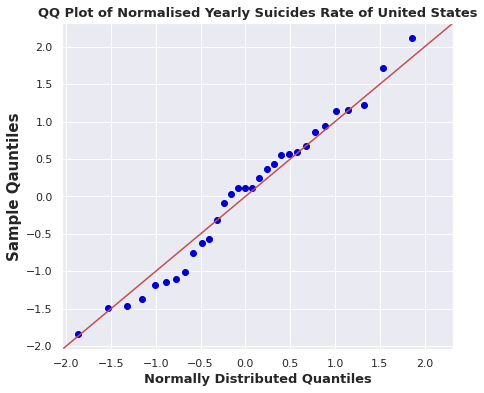

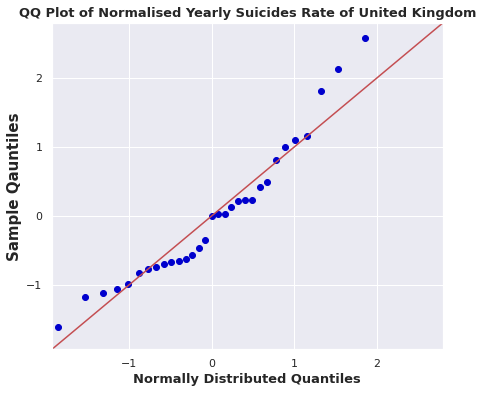

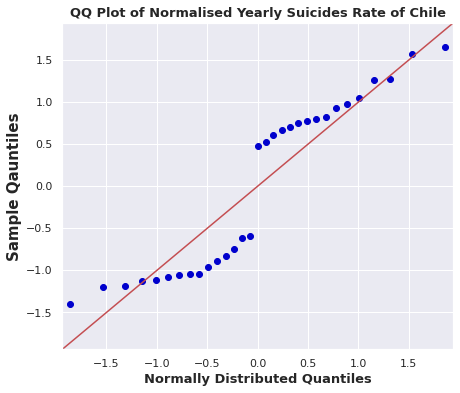

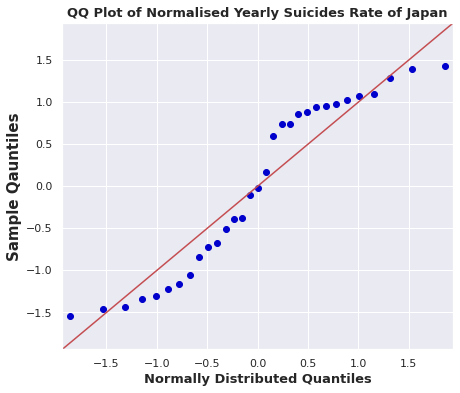

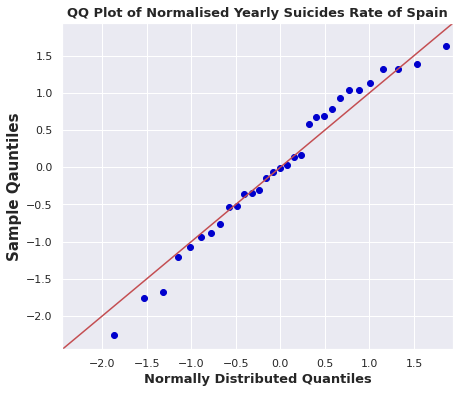

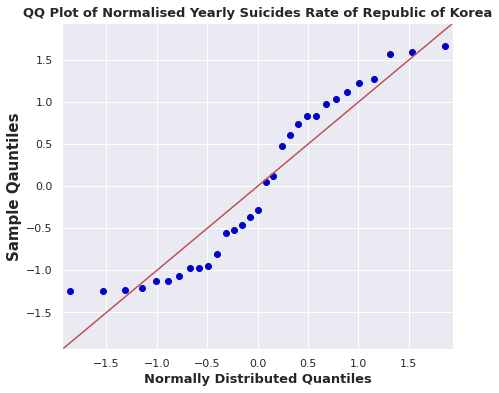

In [7]:
for country in country_choice:
    suicides_rate_yearly= np.array(df.groupby(['country','year'])['suicides_no'].sum()[country])\
                          / np.array(df.groupby(['country','year'])\
                           ['population'].sum()[country])*100000
    
    fig,ax=plt.subplots(figsize=(7,6))
    sm.qqplot(suicides_rate_yearly, fit=True, line='45',ax=ax, color='mediumblue')
    
    plt.ylabel("Sample Qauntiles", size=15,fontweight='bold')
    plt.xlabel("Normally Distributed Quantiles",size=13, fontweight='bold')
    plt.title("QQ Plot of Normalised Yearly Suicides Rate of %s"%country, size=13,fontweight='bold')
    
    plt.show();

# **Q1) c)Log likelihood of data**

$p(x)= \frac{1}{\sqrt{2\pi}\sigma}exp(\frac{-(x-\mu)^2}{\sigma^2})$

$Log \ Likelihood= \frac{-1}{2\sigma^2}\sum_{i=1}^{n}(x_i-\mu)^2 -\frac{n}{2}\log{2\pi\sigma^2} \$

In [8]:
i=0
print("LOG LIKELIHOOD :")

for country in country_choice:
    #Yearly Suicides Rate for each of the 6 countries per 100k Population
    suicides_rate_yearly= np.array(df.groupby(['country','year'])['suicides_no'].sum()[country])\
                          / np.array(df.groupby(['country','year'])\
                           ['population'].sum()[country])*100000
    
    #Calculating Log Likelihood using the formula above
    logMLE= 0.5*np.sum(-(suicides_rate_yearly-meansr[i])**2)/varsr[i]\
             -len(suicides_rate_yearly)*np.log(np.sqrt(2*np.pi*varsr[i]))
    
    print(f"{country} = %.3f"%logMLE)
    i+=1

LOG LIKELIHOOD :
United States = -40.487
United Kingdom = -31.838
Chile = -75.453
Japan = -80.224
Spain = -23.964
Republic of Korea = -111.564


Yes! There is indeed a relationship between the visual obtained from the QQ Plots and the Log Likelihood Estimates.
The QQ Plots of the countries **United States, United Kingdom and Spain** which have their QQ plots almost along the 45 degree straight line indicating a good correlation with the line and hence a higher possibility of their Distribution being Gaussian, hence have a comparitively higher Log Likelihood!

As compared to the countries **Japan, Chile and Republic of Korea**, who have a much smaller Log Likelihood and their QQ Plot is also not really that correlated with the 45 degree straight line.

# **Q1) d) 95% C.I of Mean Yearly Suicides Rate**

$\mu= Population \ mean$

$\bar{x}= Sample \ mean$

$P[|\mu - \bar{x}| \leq \epsilon] \leq \alpha$

$ If \ \alpha=0.05\, we \ say \ with \ 95\% \ confidence \ that \ \mu \ lies \ in \ (\bar{x}-\epsilon, \bar{x}+\epsilon)$

$P[ \bar{x}-\epsilon \leq \mu \leq \bar{x}+\epsilon] \leq \alpha  \implies \epsilon=\frac{ z_{\alpha/2}\sigma}{\sqrt{n}}$

$ For \ X \ \sim N(0,1) \ z_{\alpha/2} is \ s.t \ P[X\leq z_{\alpha/2}]= 1-\frac{\alpha}{2} $

In [9]:
from scipy.stats import norm
i=0

print("95% CI for Mean of Yearly Suicide Rate:")

for country in country_choice:
    alpha= 0.05
    std= np.sqrt(varsr[i]) #Sample Unbiased Standard Deviation
    
    suicides_rate_yearly= np.array(df.groupby(['country','year'])['suicides_no'].sum()[country])\
                          /np.array(df.groupby(['country','year'])\
                           ['population'].sum()[country])*100000
    
    n=len(suicides_rate_yearly) #Number of Samples
    z= norm.ppf(1-alpha/2)
    epsilon= z*std/np.sqrt(n)
    lowlim= meansr[i]-epsilon
    uplim= meansr[i]+epsilon
    
    print(f"{country} : (%.3f, %.3f)"%(lowlim, uplim))
    i+=1

95% CI for Mean of Yearly Suicide Rate:
United States : (12.519, 13.158)
United Kingdom : (7.626, 8.110)
Chile : (8.576, 10.550)
Japan : (20.769, 23.072)
Spain : (7.974, 8.350)
Republic of Korea : (16.152, 22.481)


# **Q1) e) Welch's t-Test & Wilcoxon Signed Rank Test**
**Spain** and **United Kingdom** have the closest means.<br>
Mean suicide rate of Spain=8.16 <br>
Mean suicide rate of UK= 7.87 

Doing Welch Test and Wilcoxon signed rank test with with **95% confidence**

####Null Hypothesis ($H_0$): Both Mean suicide rates are the same
####Alternate Hypothesis ($H_1$): Both mean suicide rates are actually different

In [10]:
#Yearly Suicide Rate for Spain
yearly_sr_spain= np.array(df.groupby(['country','year'])['suicides_no'].sum()['Spain'])\
                          / np.array(df.groupby(['country','year'])\
                           ['population'].sum()['Spain'])*100000

#Yearly Suicide rate for United Kingdom
yearly_sr_uk= np.array(df.groupby(['country','year'])['suicides_no'].sum()['United Kingdom'])\
                          / np.array(df.groupby(['country','year'])\
                           ['population'].sum()['United Kingdom'])*100000

alpha=0.05 #Significance Level

## **i) Welch's t- Test**


In [11]:
#Welch Test Begins
from scipy import stats 

t, pval= stats.ttest_ind(yearly_sr_uk, yearly_sr_spain, equal_var= False)

if alpha >= pval:
    print("t-value = %f"%t)
    print("Significance Level = %d"%(alpha*100,))
    print("P-value = %f"%pval)
    print("Null Hypothesis rejected. So, the mean suicide rates of Spain and UK truly differ from each other")
else:
    print("t-value = %f"%t)
    print("Significance Level = %d%%"%(alpha*100,))
    print("P-value = %f"%pval)
    print("Failed to reject Null Hypothesis. So, the mean suicide rates of Spain and UK are essentially the same")

t-value = -1.794206
Significance Level = 5%
P-value = 0.078130
Failed to reject Null Hypothesis. So, the mean suicide rates of Spain and UK are essentially the same


## **ii) Wilcoxon's Signed Rank Test**

In [12]:
#Wilcoxon Signed Rank Test Begins

_, pval = stats.wilcoxon(yearly_sr_uk-yearly_sr_spain)

if alpha >= pval:
    print("Significance Level = %d%%"%(alpha*100,))
    print("P-value = %f"%pval)
    print("Null Hypothesis rejected. So, the mean suicide rates of Spain and UK truly differ from each other")
else:
    print("Significance Level = %d%%"%(alpha*100,))
    print("P-value = %f"%pval)
    print("Failed to reject Null Hypothesis. So, the mean suicide rates of Spain and UK are essentially the same")


Significance Level = 5%
P-value = 0.065464
Failed to reject Null Hypothesis. So, the mean suicide rates of Spain and UK are essentially the same


# **Q1) f) Paired Test (paired by Year)**
Confidence Level is **95%**
####Null Hypothesis ($H_0$): $\overline{d}$ actually equals 0
####Alternate Hypothesis ($H_1$): $\overline{d}$ $\neq$ 0 

In [13]:
d= yearly_sr_uk- yearly_sr_spain #Pairing Parameter, paired by their difference
d_bar= d.mean() #Sample Mean

#Can we say with 95% Confidence that d_bar != 0 ?
t, pval= stats.ttest_1samp(d, 0)

if alpha >= pval:
    print("t-value = %f"%t)
    print("Significance Level = %d"%(alpha*100,))
    print("P-value = %f"%pval)
    print("Null Hypothesis rejected. So, the mean suicide rates of Spain and UK truly differ from each other")
else:
    print("t-value = %f"%t)
    print("Significance Level = %d%%"%(alpha*100,))
    print("P-value = %f"%pval)
    print("Failed to reject Null Hypothesis. So, the mean suicide rates of Spain and UK are essentially the same")

t-value = -1.579108
Significance Level = 5%
P-value = 0.124799
Failed to reject Null Hypothesis. So, the mean suicide rates of Spain and UK are essentially the same


# **Q1) g) Yearly Suicide Rate and its Correlation with HDI & GDP (per capita)**






## **i) Yearly Suicide Rate for Each Country**

In [14]:
tot_suicides= df.groupby(['country','year'])['suicides_no'].sum()
tot_population= df.groupby(['country','year'])['population'].sum()
sr_forall= tot_suicides*100000/tot_population
a= sr_forall.reset_index().rename(columns={0:'suicide rate/100k pop'})

In [15]:
b=df.groupby(['country','year'])['HDI for year'].mean().reset_index()
c=df.groupby(['country','year'])['gdp_per_capita'].mean().reset_index()
a['HDI'], a['gdp_per_capita']=b['HDI for year'], c['gdp_per_capita']

#Dataframe containing country and yearwise suicide rate, HDI,GDP per capita
a

,country,year,suicide rate/100k pop,HDI,gdp_per_capita
0,Albania,1987,2.694125,NaN,796
1,Albania,1988,2.279058,NaN,769
2,Albania,1989,2.425886,NaN,833
3,Albania,1992,1.665190,NaN,251
4,Albania,1993,2.600363,NaN,437
...,...,...,...,...,...
2316,Uzbekistan,2010,5.707206,0.655,1533
2317,Uzbekistan,2011,6.313022,0.661,1767
2318,Uzbekistan,2012,6.955545,0.668,1964
2319,Uzbekistan,2013,7.265567,0.672,2150


# **ii) Correlation of Suicide Rate with HDI and GDP per capita with significance levels**

$t=r{\sqrt {\frac {n-2}{1-r^{2}}}}$


$n=$ No. of Samples; so $n-2$ is the Degree of Freedom<br>
$r=$ Pearson Correlation Coefficient

Then use the Student's $t$ Distribution with Degree of Freedom $= n-2$ to calculate $P(|X|>t) = 2*(1- P(X \leq |t|) ) = 2*(1 - F_X(|t|))$

In [16]:
r_hdi, p_hdi= stats.pearsonr(a.dropna()['suicide rate/100k pop'],a.dropna()['HDI'])
r_gdp, p_gdp= stats.pearsonr(a['suicide rate/100k pop'],a['gdp_per_capita'])


print("Correlation Coefficient between Suicide Rate (per 100k pop) and HDI is : %.4f"%r_hdi)
print("Its Significance Level is: %s \n"%p_hdi)

print("Correlation Coefficient between Suicide Rate (per 100k pop) and GDP per \
capita is : %.4f"%r_gdp)
print("Its Significance Level is: %f"%p_gdp)

Correlation Coefficient between Suicide Rate (per 100k pop) and HDI is : 0.2167
Its Significance Level is: 7.537396881903724e-09 

Correlation Coefficient between Suicide Rate (per 100k pop) and GDP per capita is : 0.0604
Its Significance Level is: 0.003622


In [17]:
"""
from scipy.stats import distributions
l = len(a.dropna()['HDI'])

t= r_hdi * np.sqrt((l-2) / (1-r_hdi**2))
distributions.t.sf(np.abs(t), l-2)*2
"""

"\nfrom scipy.stats import distributions\nl = len(a.dropna()['HDI'])\n\nt= r_hdi * np.sqrt((l-2) / (1-r_hdi**2))\ndistributions.t.sf(np.abs(t), l-2)*2\n"

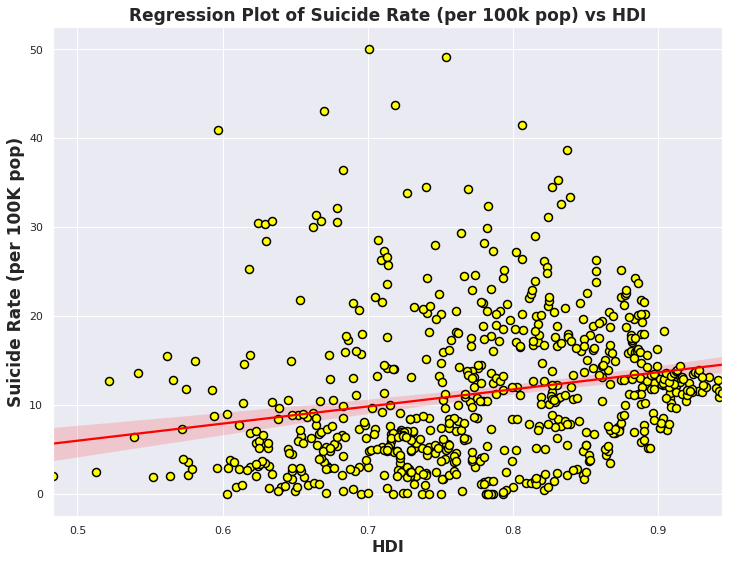

In [18]:
plt.subplots(figsize=(12,9))
plt.plot(a['HDI'],a['suicide rate/100k pop'], 'o',mec='black', mew=1.5, color='yellow',ms=8)
sns.regplot(a['HDI'],a['suicide rate/100k pop'], color='red')

plt.xlabel('HDI', fontweight='bold', size=16)
plt.ylabel('Suicide Rate (per 100K pop)', fontweight='bold', size=17)
plt.title("Regression Plot of Suicide Rate (per 100k pop) vs HDI",\
          fontweight='bold',size=17)
plt.show();

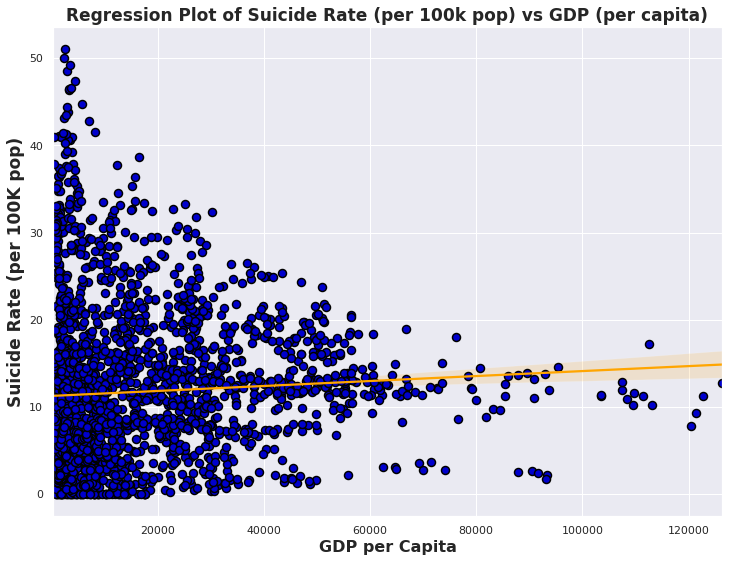

In [19]:
plt.subplots(figsize=(12,9))
plt.plot(a['gdp_per_capita'],a['suicide rate/100k pop'], 'o',mec='black', mew=1.5, color='mediumblue',ms=8)
sns.regplot(a['gdp_per_capita'],a['suicide rate/100k pop'], color='orange')

plt.xlabel('GDP per Capita', fontweight='bold', size=16)
plt.ylabel('Suicide Rate (per 100K pop)', fontweight='bold', size=17)
plt.title("Regression Plot of Suicide Rate (per 100k pop) vs GDP (per capita)",\
          fontweight='bold',size=17)
plt.show();